# Logistic Regression: Concept and Implementation


## About Me

These lessons have been prepared by:

**Saurav Gupta**   

[**LinkedIn Profile**](https://www.linkedin.com/in/gupta-saurav/)

- Data Analyst @ [**Nordstrom**](https://en.wikipedia.org/wiki/Nordstrom) (Supply Chain Data Science)
- Experience in Retail, Consulting Analytics
- Master's in Business Analytics 
- Computer Science Graduate 
- Passionate about Data Storytelling for big-data insights and explaining data science to non-tech business audience


In this lesson we will learn about a classic ML classification model and discuss the following 
1. What is Classification?
2. Difference Between Linear and Logistic Regression
3. What is Logistic Regression?
4. Cost Function and Gradient Descent 
5. Evaluation Metrics
6. Implementation 

### Assumptions:
I am assuming the audience here has some python coding expereince and little familiar with Data Science jargons and glossary

# 1. What is Classification ?

Classification is the process of predicting the class of given data points. Classes are sometimes called as **targets/labels or categories**.


**For example**   
**Email : Spam/ Not Spam**  
**Online Transections - Fraud (Yes/No)**  
**Tumor: Malingnant/Benign**  

In all of these cases our Target Variable Y = (0, 1) 
0 - Negative Class (Not Spam)
1 - Positive Class (Spam)

In math Term:  
Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to **discrete output variables (y)**.


In email service providers can be identified as a classification problem because the output would be either Spam or not Spam i.e. binary classification 

Other examples:  
- Credit approval 
- Medical diagnosis

# 2. Difference Between Linear and Logistic Regression 


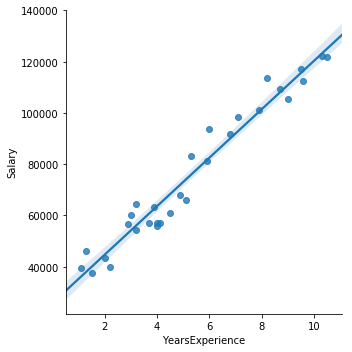

In [16]:
sal_data = pd.read_csv('Salary_Data.csv')
sns.lmplot('YearsExperience','Salary', data = sal_data)

### But suppose if a problem is like this where in we are modelling whether a person with certain age will take an marketing offer or not 

### (1 = Yes, 0 = No)

In [46]:
d = {'Age': np.random.randint(13,70, size=20),
    'Offer': np.random.randint(2, size = 20)}
d= pd.DataFrame(data=d)
print(d.sort_values(by= "Age").head(5))

    Age  Offer
9    17      1
12   18      0
14   20      1
19   27      1
7    28      0


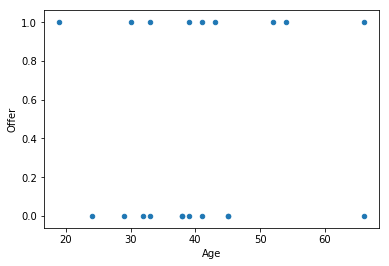

In [44]:
d.plot.scatter(x = 'Age', y ='Offer')

<img src="img/logit_linear_line.png" width="400">

So if we try to fit a linear line here it what happens ?
1. It is actually not representing the data correctly
2. Also this linear line can output **y > 0 and y < 0** but we know our target variables are either (0,1)

So here Logistic Regression comes to rescue

**NOTE**   
Both linear and logistic regression are used to predict certain results taking into consideration previous historical data. 

The main difference between them is the type of prediction each one does: 
1. Linear regression predicts any value. In order to do this, linear regression takes as input independent values CONTINUOUS VARIBLES, in other words, variables that can take any value, and hence, our prediction will also be a continuous variable and can take any value. 

2. Logistic regression - it predicts the probability of bounded possible outcomes, in other words, logistic regression is a CLASSIFICATION algorithm.


# 3. What is Logistic Regression ?

## 3.1 Intuition and Representation 

We want our **0 <= y <= 1**

To limit this we apply Sigmoid Function (Logistic Function) which keeps our values between 0 to 1 
<img src="img/logit.png" width="600">

<img src="img/lreq1.png" width="500">

This green box is our Logistic regression equation, notice it is kind of simillar to linear regression equation but 
on the left side it has log odds instead of y

i.e estimated probability that y = 1 on any given x inputs 

Example in the above example:    
X = (x0, Age)  
P(Y=1, given X) = 0.7  
  
So it Says this person has 70% chances of accepting the offer and P lies between 0 and 1 so there are only two possile outcomes 

## Decision Boundary
Our current prediction function returns a probability score between 0 and 1. In order to map this to a discrete class (Offer (Yes or NO)), we select a threshold value.  
Suppose we choose threshold as 0.5 
so **p >= 0.5** ~ Offer Accepted (1) 
   **p <= 0.5** ~ Offer Rejected (0)
   
<img src="img/db.png" width="500">



# 4. Cost Function

If you guys remember cost fucntion from Linear Regression:


<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>=</mo>
  <mi>m</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
</math>

<img src="img/costlr.png" width="600">

But we cant use the same Cost Function here 
- Firstly, we applied sigmoid transformation here so our prediction function is not linear as compared to Linear Regression
- Secondly, if we square prediction as we do in MSE results in a non-convex function with many local minimums. If our cost   function has many local minimums, gradient descent may not find the optimal global minimum

<img src="img/nonconvex.png" width="600">

So we need a **neat convex function** - bowl shaped with so that gradient descent can find the optimal global minimum

#### Deriving Cost Function for Logistic Regression
##### We use Cross Entropy/Log Loss:  
Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value.   
A perfect model will have zero log loss.
<img src="img/logloss1.png" width="600">

**Cost Function:**  
<img src="img/ng_cost_function_logistic.png" width="400">

**Intuition:**  
In words, a function,    
Cost that takes two parameters in `input: hθ(x(i)) as hypothesis function and y(i) as output.`


You can think of it as the cost the algorithm has to pay if it makes a `prediction hθ(x(i))` while the actual label was `y(i)`.


<img src="img/y1andy2_logistic_function.png" width="500">

- Case 1, when y = 1
the output (i.e. the cost to pay) approaches to 0 as hθ(x) approaches to 1. Conversely, the cost to pay grows to infinity as hθ(x) approaches to 0. This is a desirable property: we want a bigger penalty as the algorithm predicts something far away from the actual value. If the label is y=1 but the algorithm predicts hθ(x)=0, the outcome is completely wrong.
- Case 2, when y = 0 
Conversely, the same intuition applies when y=0.Bigger penalties when the label is y=0 but the algorithm predicts hθ(x)=1.


**Cost function Compressed into One:**     
<img src="img/cost_together.png" width="500">

So if y = 1, second side cancels and y = 0 first side cancels 

# 5. Gradient Descent 
Just like in Linear Regression, GD works here as well its an optimization algorithm aiming to  
`minJ(θ)`

### Intuition
Suppose you are on a hilltop and you need to climb down the hill rapidly
1. Look around 360 and choose a best direction
   2. Took one step and then again repeat 1  
   3. Repeat until you reach down   
   
<img src="img/grad_des.png" width="500">  

### Steps:
1. Have some Cost Function with θ vector
2. Keep Changing θ vector to reduce J(θ) until we reach the minimum 

### Math:
- Now we need to figure out how to minimize J(θ)
- Repeatedly update each parameter using a learning rate

<img src="img/gd.png" width="500">  

- If you had n features, you would have an n+1 column vector for θ  
- This equation is the same as the linear regression rule. The only difference is that our definition for the hypothesis has changed  
- When implementing logistic regression with gradient descent, we have to update all the θ values (θ0 to θn) simultaneously

#### What's going on here?
1. We're doing this for each j (0 until n) as a simultaneous update (like when n = 1)
2. So, we re-set θj to 
   - θj minus the learning rate (α) times the partial derivative of of the θ vector with respect to θj 
   - In non-calculus words, this means that we do
        - Learning rate
        - Times 1/m (makes the maths easier)
        - Times the sum of
            - The hypothesis taking in the variable vector, minus the actual value, times the j-th value in that variable vector for EACH example
            
Also it helps if you plot J(θ) with no of iterations to understand whats happening   
<img src="img/cost_gd.png" width="500"> 


# 6. Evaluation Metrics for a Classification Model

## 6.1 Setting the threshold and its effects ??
So we talked about threshold values right, it will help us to classify each observation into one of the classes.

The threshold value is something the we can specify, so, which is the best value for it? 

This election often depends on error preferences and there are two types of errors that we need to take into consideration: **False positives, and False negatives.**

**False Positive : Actual  = 0, Model Says = 1 aka Type 1 Error  
  False Negative : Actual  = 1, Model says = 0 aka Type 2 Error ** 

So you adjust the threshold to reduce these errors:

**Example 1: Treating Patients** .  
- Suppose you built a model to predict whether or not someone will develop heart disease in the next 10 years  

- We will consider class 1 to be the outcome in which the person does develop heart disease, and class 0 the outcome in which the person does not develop heart disease  

- Here you would want to reduce False Negatives, so if we increase the threshold we will make more FN errors i.e we missed a patient who's going to have a heart disease. We would not wnat that right ?  

**Example 2: Email junkbox**
- Now, let’s go back to Spam/Not Spam example.  

- Let’s classify spam messages as class 1 and non-spam messages as class 0.   

- Here you would want to reduce False Positives, a false positive error means that we predicted a message was spam, and sent it to the spam folder, when it actually was not spam.   

- We might have just sent an important email to the junk folder! On the other hand, a false negative error means that we predicted a message was not spam, when it actually was. This creates a slight annoyance for the user (since they have to delete the message from the inbox themselves) but at least an important message was not missed.



## 6.2 Confusion Matrix

Its an evaluation metric, in a table layout that allows visualization of the performance of an algorithm.

<img src="img/confusion_matrix.png" width="600"> 



<img src="img/confusion_matrix1.png" width="600"> 

**Senstivity/TPR:** Measures the proportion of positives which are correctly identified as such

**Specificity:** Measures the proportion of negatives which are correctly identified as such

**Accuracy:** Measures the proportion of positives and negatives that have been correctly labelled.

## 6.3 ROC Curves 

It is  a graphical plot that illustrates the performance of a binary classifier system as its discrimination threshold is varied.   

The curve is created by plotting the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings.  

<img src="img/roc.png" width="600"> 

**The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing 100% sensitivity (no false negatives) and 100% specificity (no false positives)**

## 6.4 AUC - Area Under The Curve
The ROC curve motivates an important metric for classification problems: the AUC, or Area Under the Curve.

<img src="img/auc.png" width="600"> 

The AUC of a model gives the area under the ROC curve, and is a number between 0 and 1. The higher the AUC, the more area under the ROC curve, and the better the model.

This area equals the probability that a randomly chosen positive example ranks above (is deemed to have a higher probability of being positive than) a randomly chosen negative example. 

# 7. Implementation

Workflow Structure

1. Problem definition
2. Acquire training and testing data
3. Wrangle, prepare, cleanse the data
4. Analyze, identify patterns, and explore the data
5. Model, predict and solve the problem

Analysis of what sorts of people were likely to survive and predict which passengers survived the tragedy

# 7.1 Import packages and Libraries 

In [48]:
# Basic Libraries
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Display options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

# Sklearn
from sklearn import preprocessing



### Acquiring Data

In [7]:
train_df = pd.read_csv('Titanic Data/train.csv')
test_df = pd.read_csv('Titanic Data/train.csv')
combine = [train_df, test_df]

In [54]:
# What are the column Names 
train_df.columns.values

#(C = Cherbourg; Q = Queenstown; S = Southampton)

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [56]:
train_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [60]:
# Investigate Datatypes -
train_df.info()
print('-' * 140)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null obje

In [61]:
# Look at distributions for Numerical Columns 
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
# Distribution for Categorical Features
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Bowen, Mr. David John ""Dai""",male,1601,G6,S
freq,1,577,7,4,644


## Missing Data Treatment

In [65]:
total = train_df.isnull().sum().sort_values(ascending = False)
percent = 100 * total / len(train_df)
missing_data = pd.concat([total,percent], axis=1, keys = ['len','%missing'])
missing_data

,len,%missing
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


**Cabin** - *77 % missing values  
we really can't impute cabin, we will drop this column later*

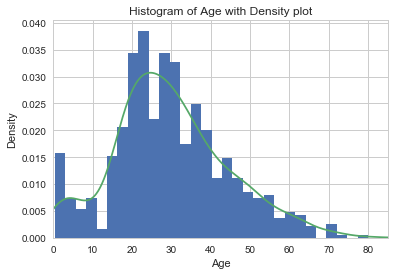

In [83]:
ax = train_df["Age"].hist(bins=30, density=True, stacked=True)
train_df["Age"].plot(kind='density')
ax.set(xlabel='Age')
plt.xlim(0,85)
plt.title('Histogram of Age with Density plot')
plt.show()

**Age** *is Rightly Skewed, not normal   
We will use median values to fill for NAN's* 

**Embarked** *has only 0.22% missing values  
Just assuming that all the missing ones were from the port where most of the people boarded*

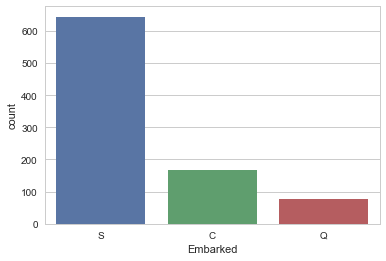

In [86]:
train_df.Embarked.astype('category').value_counts()

sns.countplot(x = 'Embarked', data = train_df)

#(C = Cherbourg; Q = Queenstown; S = Southampton)

### Imputations

In [87]:
train_data = train_df.copy()

## Fill Age with Median
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True) 

## Fill Embarked with Southampton
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

## Drop Cabin
train_data.drop('Cabin', axis=1, inplace=True)

In [88]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [89]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [90]:

# Create categorical variables and drop some variables

training = pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()



,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


**So to keep out training and testing data consistent we need to apply all these transformation in test data as well**

#### Applying transformations to test data 

In [91]:
# Look for missing Values 
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
test_data = test_df.copy()

# Imputing missing age with Median
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

## Fill Embarked with Southampton
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

# Drop Cabin
test_data.drop('Cabin', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])

testing.drop('Sex_female', axis=1, inplace=True)

testing.drop('PassengerId', axis=1, inplace=True)

testing.drop('Name', axis=1, inplace=True)

testing.drop('Ticket', axis=1, inplace=True)

final_test = testing

final_test.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


## Data Exploration

**Age**

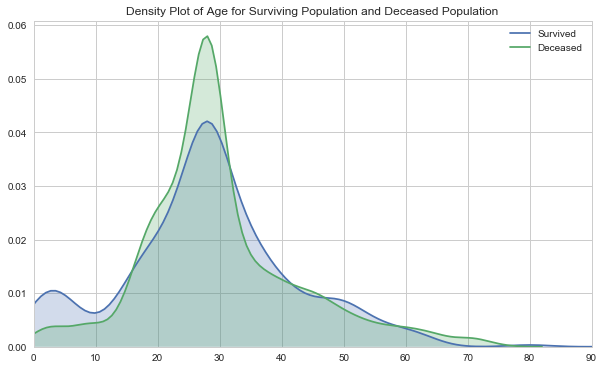

In [149]:
fig = plt.figure(figsize=(10,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(train_data["Age"][train_data.Survived == 1], ax = ax, shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], ax = ax, shade=True)
plt.legend(['Survived', 'Deceased'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.xlim(0,90)
plt.show()

Distributions are almost simillar, 
*Mostly children survived* 

**Fare**

<Figure size 432x288 with 0 Axes>

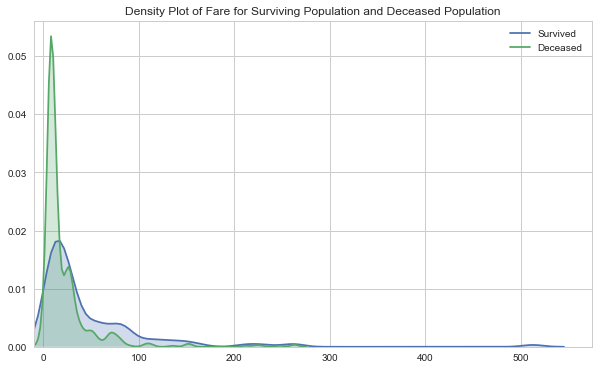

In [153]:
plt.clf()
fig = plt.figure(figsize=(10,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.kdeplot(train_data["Fare"][train_data.Survived == 1], ax = ax, shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], ax = ax, shade=True)
plt.legend(['Survived', 'Deceased'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
plt.xlim(-10,)
plt.show()

Distributions are totally different, 
*interesting- the ones who paid less are less likely to survive* 

**Passenger Class**

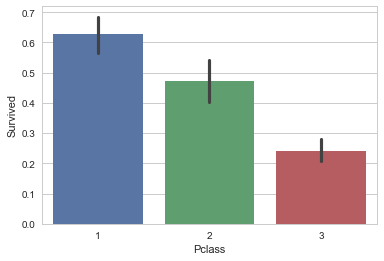

In [157]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_data)

*It seems first class was the most safest*

**Embarked**

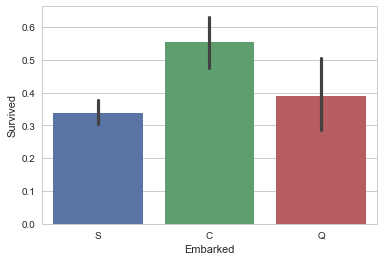

In [158]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_data)

*C = Cherbourg; 
Q = Queenstown; 
S = Southampton*

**Sex**

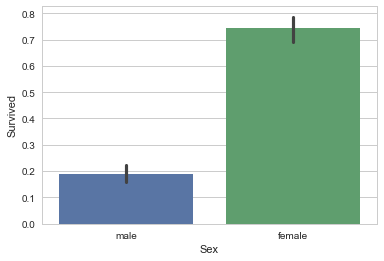

In [159]:
sns.barplot('Sex', 'Survived', data=train_data)
plt.show()

### **Corelations**

## Logistic Regression And Results

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [94]:
# Create X's and Y 


X = final_train.drop("Survived", axis=1)

y = final_train['Survived']


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [99]:
from sklearn.linear_model import LogisticRegression

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [101]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1] #Will give us the probability values 

In [112]:
logreg.coef_

array([[-0.03874631, -0.36936835, -0.01870256,  0.00354227,  1.42570772,
         0.65356269, -0.52790005,  0.64232153,  0.60104895,  0.30799988,
        -2.60855109]])

In [114]:
coeff_df = pd.DataFrame(final_train.columns.delete(0))
coeff_df.columns = ['Feature']

coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

# Positive Coefficeints increases the log odds of response right - so 


,Feature,Correlation
4,Pclass_1,1.425708
5,Pclass_2,0.653563
7,Embarked_C,0.642322
8,Embarked_Q,0.601049
9,Embarked_S,0.308000
3,Fare,0.003542
2,Parch,-0.018703
0,Age,-0.038746
1,SibSp,-0.369368
6,Pclass_3,-0.527900


Positive Coefficeints increases the log odds of response right - so 
1. P in class 1 are most likely to survive i.e have more odds than Pclass 2 or 3 
2. Sex_male is least likely to survive ~ More females survive 
3. As Age increases P of Survived = 1 decreases


In [142]:
len(X_test)

179

# Metrics
1. Confusion Matrix

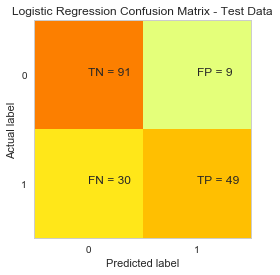

In [141]:
#Confusion Matrix 

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Logistic Regression Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.rcParams["axes.grid"] = False
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

2. Accuracy, AUC and Log Loss 

In [105]:

y_pred_proba = logreg.predict_proba(X_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.509
LogisticRegression auc is 0.833


3. ROC-AUC Curve 

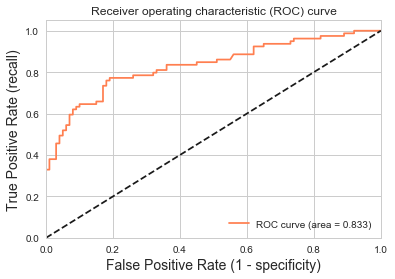

In [116]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Next Steps 
### Feature Engineering 

sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard

These variables just says if families were travelling together or not so i cretaed a new variable 


train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)

## Cross Validation 

## Other Classification Models

## Corelations:
# correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train_data[cols].values.T)
f, ax = plt.subplots(figsize=(14, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()